In [9]:
import xml.etree.ElementTree as ET
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as mp # import du package 'matplotlib' avec alias 'mp'
import requests


# URL de la série
url_or = "https://bdm.insee.fr/series/sdmx/data/SERIES_BDM/010002100"

# Récupérer les données XML
response = requests.get(url_or)
response.raise_for_status()  # Vérifie que la requête est réussie
xml_content = response.content

# Parser le contenu XML
root = ET.fromstring(xml_content)
# Charger le contenu XML
root = ET.fromstring(xml_content)

# Initialiser une liste pour stocker les données
data = []

# Parcourir chaque série
for series in root.findall(".//{*}Series"):
    # Parcourir les observations dans la série
    for obs in series.findall(".//{*}Obs"):
        # Extraire les attributs pertinents
        time_period = obs.attrib.get("TIME_PERIOD")
        obs_value = obs.attrib.get("OBS_VALUE")
        # Ajouter les données à la liste
        data.append({"TIME_PERIOD": time_period, "OBS_VALUE": obs_value})

# Créer un DataFrame à partir des données extraites
df_or = pd.DataFrame(data)

# Convertir les colonnes en types appropriés
df_or["TIME_PERIOD"] = pd.to_datetime(df_or["TIME_PERIOD"], format="%Y-%m")
df_or["OBS_VALUE"] = pd.to_numeric(df_or["OBS_VALUE"])

# Afficher les 5 premières lignes
print(df_or.head())


  TIME_PERIOD  OBS_VALUE
0  2024-11-01      269.6
1  2024-10-01      266.7
2  2024-09-01      249.9
3  2024-08-01      242.5
4  2024-07-01      238.8


In [10]:
# Conversion de TIME_PERIOD en datetime pour faciliter le filtrage
df_or['TIME_PERIOD'] = pd.to_datetime(df_or['TIME_PERIOD'], format='%Y-%m')

# Filtrer les années entre 2013 et 2023
start_date = '2013-01-01'
end_date = '2023-12-31'
df_or = df_or[(df_or['TIME_PERIOD'] >= start_date) & (df_or['TIME_PERIOD'] <= end_date)]

In [11]:
# URL de la série
url_petrol = "https://bdm.insee.fr/series/sdmx/data/SERIES_BDM/010002091"

# Récupérer les données XML
response = requests.get(url_petrol)
response.raise_for_status()  # Vérifie que la requête est réussie
xml_content = response.content

# Parser le contenu XML
root = ET.fromstring(xml_content)
# Charger le contenu XML
root = ET.fromstring(xml_content)

# Initialiser une liste pour stocker les données
data = []

# Parcourir chaque série
for series in root.findall(".//{*}Series"):
    # Parcourir les observations dans la série
    for obs in series.findall(".//{*}Obs"):
        # Extraire les attributs pertinents
        time_period = obs.attrib.get("TIME_PERIOD")
        obs_value = obs.attrib.get("OBS_VALUE")
        # Ajouter les données à la liste
        data.append({"TIME_PERIOD": time_period, "OBS_VALUE": obs_value})

# Créer un DataFrame à partir des données extraites
df_petrol = pd.DataFrame(data)

# Convertir les colonnes en types appropriés
df_petrol["TIME_PERIOD"] = pd.to_datetime(df_petrol["TIME_PERIOD"], format="%Y-%m")
df_petrol["OBS_VALUE"] = pd.to_numeric(df_petrol["OBS_VALUE"])

# Afficher les 5 premières lignes
print(df_petrol.head())

  TIME_PERIOD  OBS_VALUE
0  2024-11-01      115.6
1  2024-10-01      115.0
2  2024-09-01      110.5
3  2024-08-01      121.1
4  2024-07-01      130.2


In [12]:
# Conversion de TIME_PERIOD en datetime pour faciliter le filtrage
df_petrol['TIME_PERIOD'] = pd.to_datetime(df_petrol['TIME_PERIOD'], format='%Y-%m')

# Filtrer les années entre 2013 et 2023
start_date = '2013-01-01'
end_date = '2023-12-31'
df_petrol = df_petrol[(df_petrol['TIME_PERIOD'] >= start_date) & (df_petrol['TIME_PERIOD'] <= end_date)]

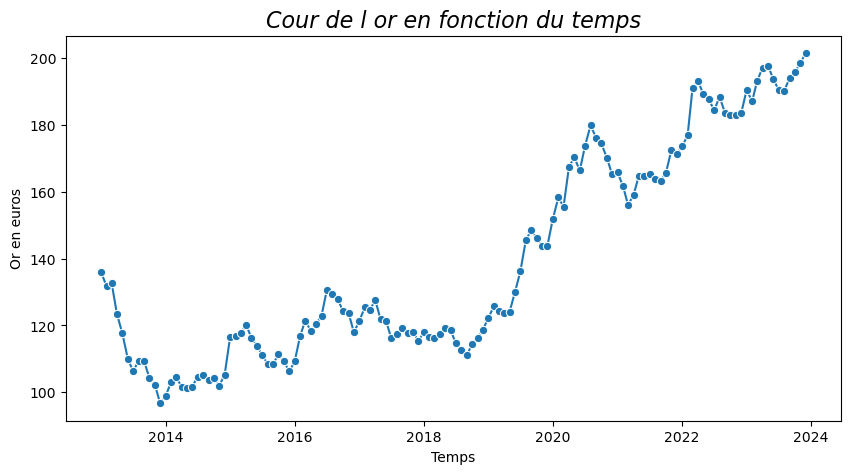

In [13]:

mp.figure(figsize=(10,5))# les figures 'seaborn' sont en fait des figures 'matplotlib'
sb.lineplot(df_or, x='TIME_PERIOD', y='OBS_VALUE', marker='o')
mp.title('Cour de l or en fonction du temps', fontsize=16, style='italic')
mp.xlabel('Temps'); mp.ylabel('Or en euros');

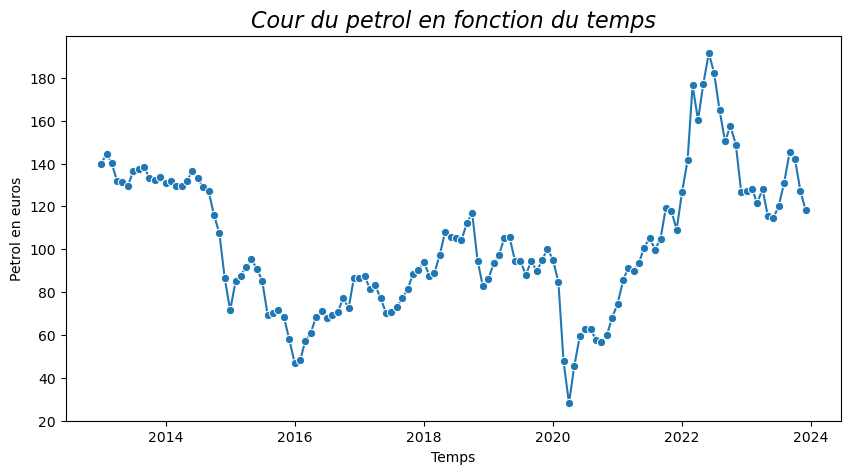

In [14]:
mp.figure(figsize=(10,5))
sb.lineplot(df_petrol, x='TIME_PERIOD', y='OBS_VALUE', marker='o')
mp.title('Cour du petrol en fonction du temps', fontsize=16, style='italic')
mp.xlabel('Temps'); mp.ylabel('Petrol en euros');